<a href="https://colab.research.google.com/github/ndhend/Winc_assignments/blob/main/Highest_temp_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Header


# Moving average
Calculating the averages using a sliding window.
Sliding window is 10 years (10YMA) using annual data.
In the column you will find meteorological year at month code 7020

Question:
Which country had the biggest change in temp looking at 10YMA between 1961 and 2019?

In Pandas, the .T attribute is used to transpose a DataFrame or a Series. Transposing a DataFrame essentially means swapping rows and columns, so that the rows become columns and the columns become rows.

.rolling(10) creates a rolling window view on the DataFrame with a window size of 10 periods. This means that for each row in the DataFrame, a calculation will be performed on the preceding 10 rows (including the current row).

,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Biggest Difference
Area,,,,,,,,,,,,,,,,,,,,,
Svalbard and Jan Mayen Islands,-1.1384,-1.3257,-0.9507,-0.6732,-0.4630,-0.4058,-0.0776,-0.0912,0.1555,0.2179,...,2.0707,2.2914,2.4342,2.6986,2.7846,2.9373,2.9670,3.1934,3.2931,4.6188
Finland,-0.2176,-0.4528,-0.3254,-0.1707,-0.0916,0.1242,0.2168,0.0853,0.1960,0.1683,...,1.3984,1.4344,1.5042,1.6402,1.6814,1.7760,1.7304,1.7328,1.7094,2.2288
Greenland,0.0596,0.0103,-0.1581,-0.2878,-0.2827,-0.4717,-0.4768,-0.3646,-0.4075,-0.3326,...,1.6436,1.6878,1.5929,1.5892,1.4239,1.4896,1.4784,1.4764,1.5844,2.2094
Kuwait,0.0985,0.1102,-0.0423,-0.1152,-0.0678,-0.0948,-0.2366,-0.1358,-0.1063,-0.0156,...,1.5647,1.5568,1.5332,1.5270,1.6672,1.6480,1.7455,1.8542,1.9247,2.1613
Morocco,0.1653,0.0319,-0.1390,-0.1458,-0.2408,-0.2350,-0.3649,-0.3578,-0.3064,-0.2550,...,1.5761,1.5975,1.5624,1.6212,1.6159,1.6599,1.7790,1.7229,1.7530,2.1439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Midway Island,0.1223,0.1201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0022
Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


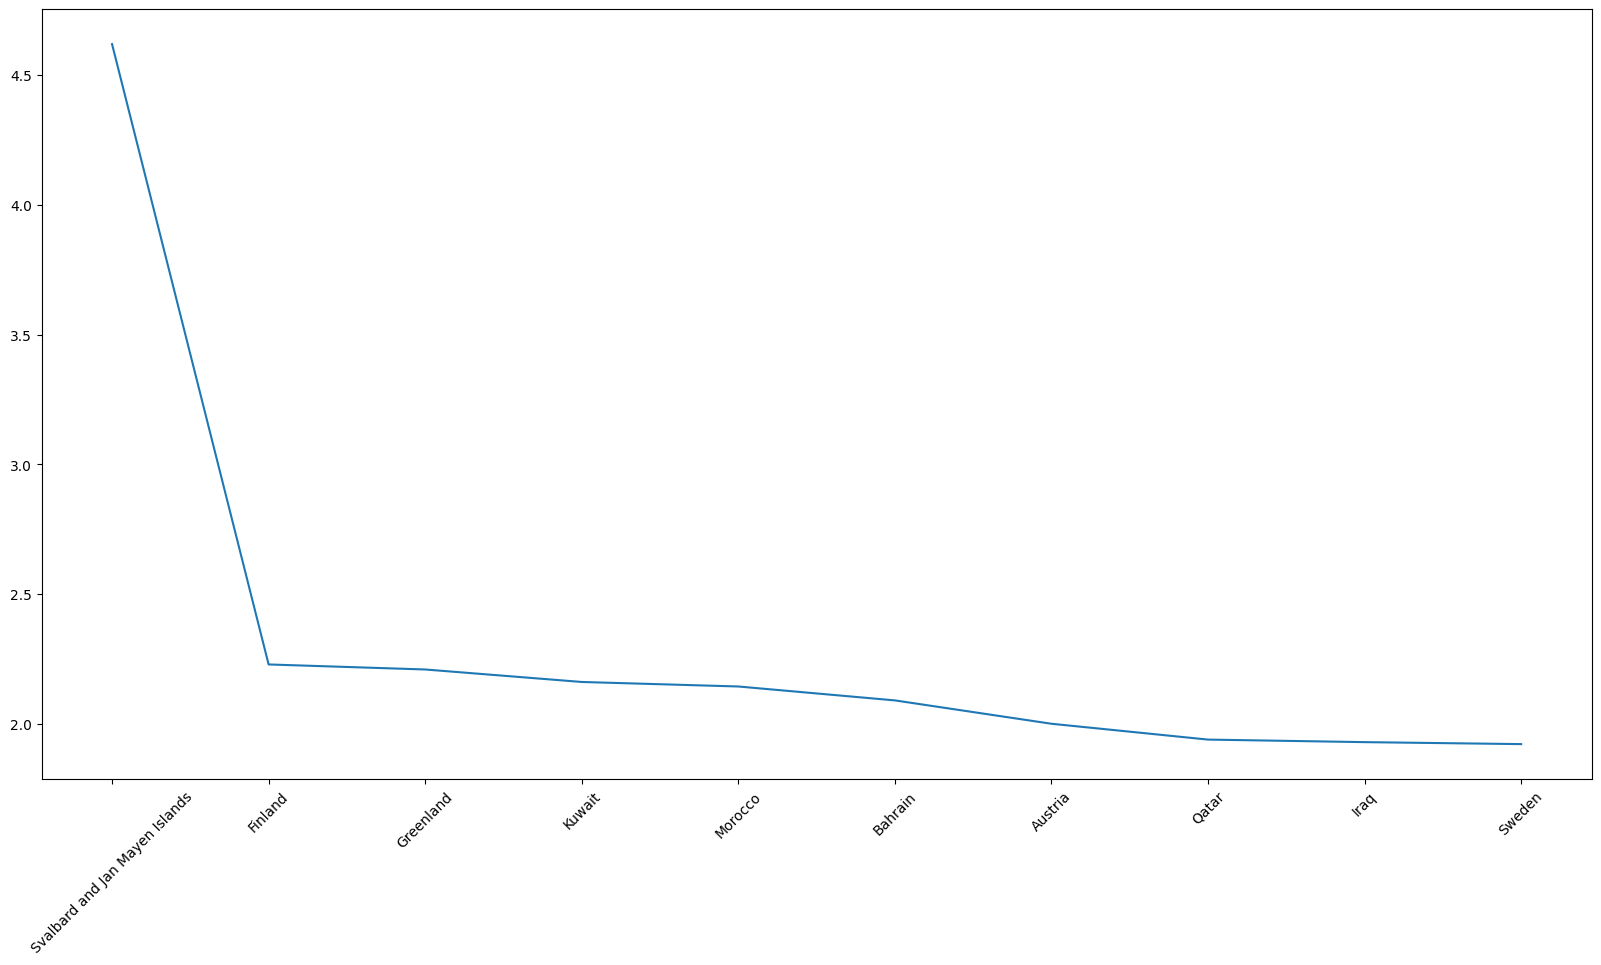

In [129]:
from sqlalchemy.sql.expression import false
from tables import index
# import all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ndhend/csv_data_winc/main/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df = pd.read_csv(url, encoding = 'ISO-8859-1')
# display(df.head(50))

# Let's only keep the Meteorological year
# Let's only keep "Temperature change"
df_by_year = df.loc[(df["Months"] == "Meteorological year") & (df["Element"] == "Temperature change")]
# display(df_by_year)

# Let's first do this with a single country
afg = df_by_year.loc[df['Area'] == "Afghanistan"]
# afg

# Let's remove non-relevant columns
afg2 = afg.drop(columns=['Area Code', 'Area', 'Months', 'Months Code', 'Element Code', 'Element', 'Unit']).T # .T
# afg2

afg2['10YMA'] = afg2.rolling(10).mean() # .rolling()
# afg2

# What is the highest and lowest 10YMA
afg2.dropna(inplace=True) # drop alle standard missing values (in our case NaN)
# afg2.plot()

low = afg2.sort_values(by='10YMA').iloc[0]['10YMA']
high = afg2.sort_values(by='10YMA').iloc[-1]['10YMA']
biggest_dif = high - low
# biggest_dif

df2 = df_by_year.drop(columns=['Area Code','Months', 'Months Code', 'Element Code', 'Element', 'Unit'])
# display(df2)
names_to_drop = [ 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD']

df3 = df2[~df2['Area'].isin(names_to_drop)]
df3.set_index('Area', inplace=True)

# Calculate rolling mean for each row (country)
moving_averages = df3.rolling(window=10, axis=1).mean()

# Display the moving averages
# display(moving_averages)

yearly_moving_averages = moving_averages.loc[:, 'Y1970': 'Y2019'].copy()

def highest_moving_average(row):
    low = row.min()
    high = row.max()
    biggest_dif = high - low
    return biggest_dif

# Assuming you already have your DataFrame with the moving averages
# df_with_moving_averages = ...

# Apply the function to each row (country) and create a new column 'Biggest Difference'
yearly_moving_averages['Biggest Difference'] = yearly_moving_averages.apply(highest_moving_average, axis=1)
biggest_change = yearly_moving_averages.sort_values(by='Biggest Difference', ascending=False)
display(biggest_change)




countries = biggest_change.index[:10]
moving_average = biggest_change['Biggest Difference'][:10]

fig, ax = plt.subplots()
ax.plot(countries, moving_average)
plt.xticks(rotation=45)
fig.set_size_inches(20,10) # Make chart a little bigger
plt.show()


